## Note
File for exploring data. Distribution, outliers, visualization etc.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math 

In [22]:
## Converting .csv file to a pandas df
df = pd.read_csv("../csv_files/development.csv")

In [23]:
## Description of the data
df.describe()

,x,y,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
count,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,...,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000,385500.000000
mean,397.723735,404.106355,4.866423,-5.046162,4.330495,97.593811,1.340462,16.510543,-9.187917,10.504198,...,608.650804,-42.152047,583.569358,71.628631,0.452944,609.060121,-46.921923,583.060292,71.695363,0.371027
std,120.593104,113.652228,1.481220,15.877804,3.489414,59.444364,0.342167,16.781018,29.955290,8.444105,...,13.723698,3.158175,6.646175,0.577619,0.299456,13.928735,3.478838,6.992203,0.585629,0.081983
min,200.000000,200.000000,1.394440,-7741.109923,-0.582573,0.000000,0.275854,2.028134,-9930.114637,-0.997301,...,451.502789,-51.840704,516.386725,70.420683,0.129428,456.816620,-57.876959,513.760083,70.423425,0.102138
25%,285.000000,310.000000,4.123941,-5.257178,2.383830,46.400000,1.096611,5.619728,-8.114323,4.755876,...,598.888989,-44.601152,579.190080,71.144733,0.342264,599.390156,-49.596344,578.269642,71.200245,0.321753
50%,400.000000,405.000000,4.668321,-4.646420,3.361071,90.600000,1.316209,10.068513,-5.229009,7.886552,...,607.190645,-42.360754,583.512671,71.627565,0.400117,607.202368,-47.147636,583.401620,71.681603,0.366981
75%,500.000000,500.000000,5.265888,-4.093211,5.104368,151.026985,1.557156,19.031319,-4.387686,12.945553,...,616.837596,-39.833169,587.982952,72.134776,0.466077,617.313303,-44.375652,587.877953,72.194196,0.415578
max,600.000000,600.000000,20.515415,-0.745816,149.589043,204.600000,6.088277,106.649066,-1.054508,152.517700,...,665.267443,-29.085419,614.884980,72.856918,5.031400,675.052221,-29.592059,619.099952,73.031394,4.925181


/Users/Martin/Dropbox/NTNU/Kybernetikk og robotikk/4.klasse/Data science lab/Project/.venv/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


array([[<Axes: title={'center': 'pmax[0]'}>,
        <Axes: title={'center': 'negpmax[0]'}>],
       [<Axes: title={'center': 'area[0]'}>,
        <Axes: title={'center': 'tmax[0]'}>],
       [<Axes: title={'center': 'rms[0]'}>, <Axes: >]], dtype=object)

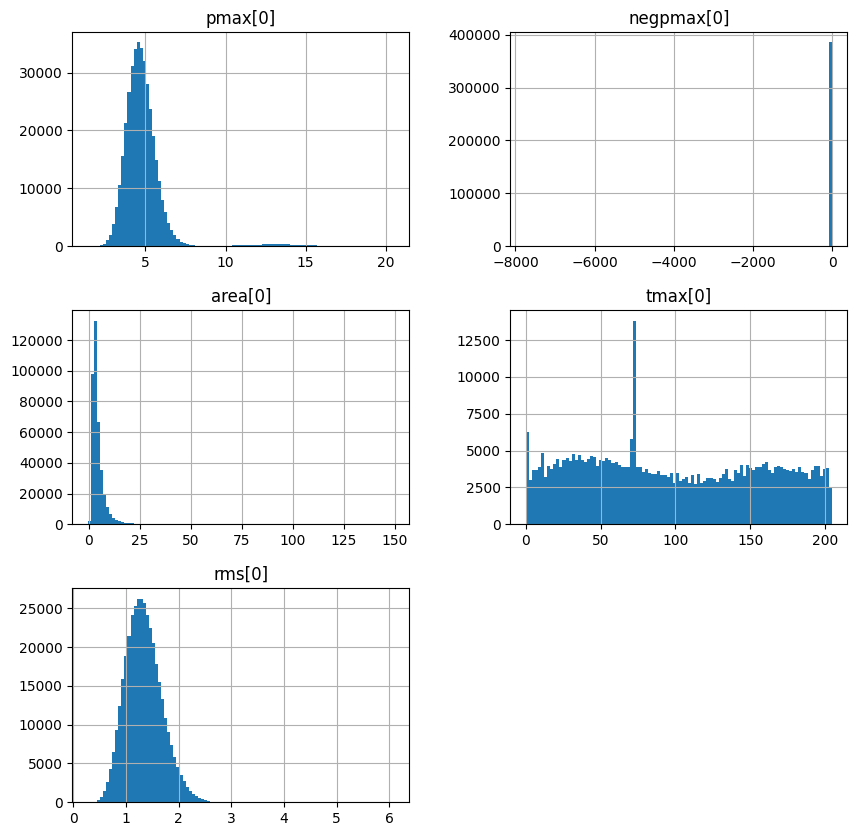

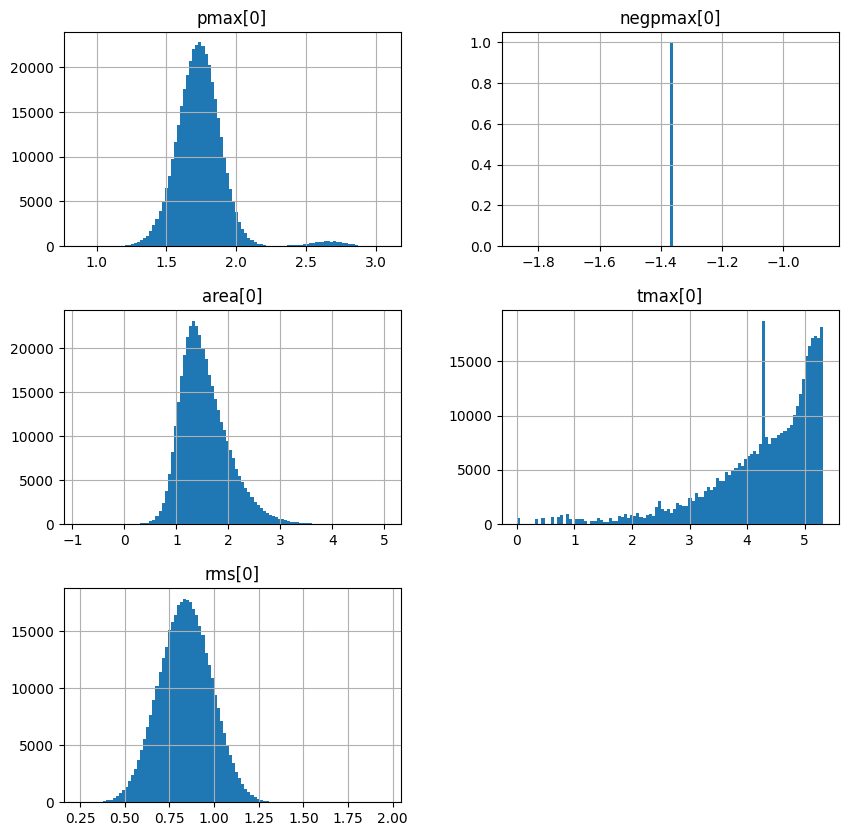

In [40]:
## Histogram of the 5 features on the first pad
log_transformed_df = np.log1p(df)
pad_0_log = log_transformed_df[["pmax[0]", "negpmax[0]", "area[0]", "tmax[0]", "rms[0]"]]
pad_0 = df[["pmax[0]", "negpmax[0]", "area[0]", "tmax[0]", "rms[0]"]]
pad_0.hist(bins=100, figsize=(10,10))
pad_0_log.hist(bins=100, figsize=(10,10))

array([[<Axes: title={'center': 'pmax[0]'}>,
        <Axes: title={'center': 'negpmax[0]'}>],
       [<Axes: title={'center': 'area[0]'}>,
        <Axes: title={'center': 'tmax[0]'}>],
       [<Axes: title={'center': 'rms[0]'}>, <Axes: >]], dtype=object)

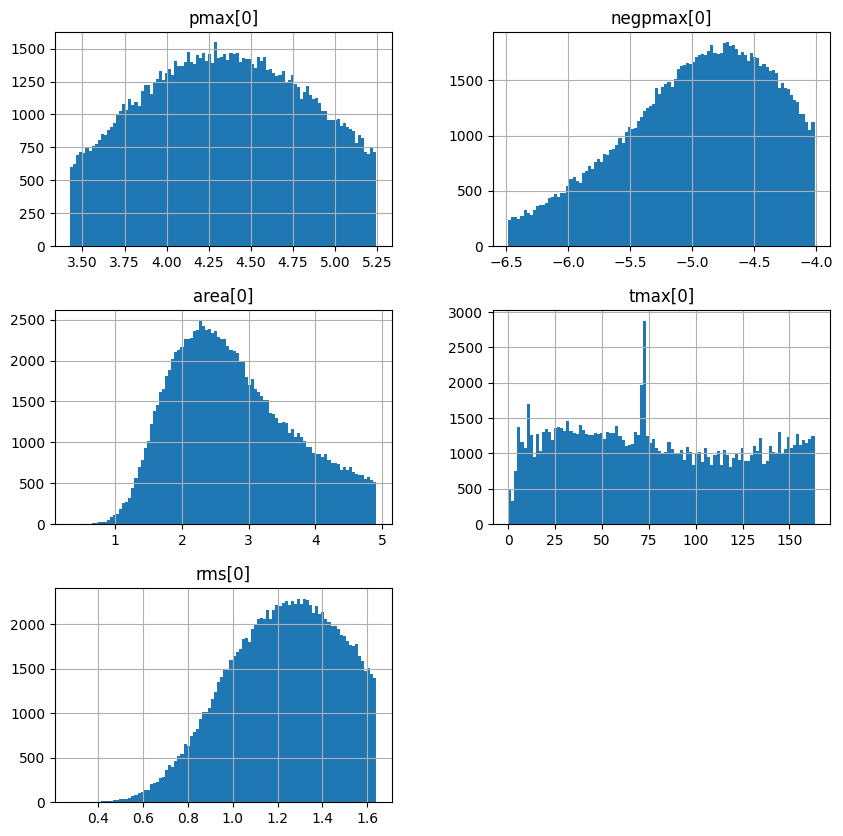

In [38]:
## Extracting only the values within the 0.95 quantile
pmax_97 = pad_0["pmax[0]"].quantile(0.97)
pmax_03 = pad_0["pmax[0]"].quantile(0.03)
pad_0 = pad_0[pad_0["pmax[0]"] <= pmax_97]
pad_0 = pad_0[pad_0["pmax[0]"] >= pmax_03]


negpmax_99 = pad_0["negpmax[0]"].quantile(0.99)
negpmax_03 = pad_0["negpmax[0]"].quantile(0.03)
pad_0 = pad_0[pad_0["negpmax[0]"] <= negpmax_99]
pad_0 = pad_0[pad_0["negpmax[0]"] >= negpmax_03]

area_97 = pad_0["area[0]"].quantile(0.97)
pad_0 = pad_0[pad_0["area[0]"] <= area_97]

tmax_97 = pad_0["tmax[0]"].quantile(0.97)
pad_0 = pad_0[pad_0["tmax[0]"] <= tmax_97]

rms_97 = pad_0["rms[0]"].quantile(0.97)
pad_0 = pad_0[pad_0["rms[0]"] <= rms_97]

pad_0.hist(bins=100, figsize=(10,10))


# filtered_df = pd.DataFrame(pad_0_pmax_95, pad_0_negpmax)